In [3]:
# EMC2 WP 2 Processing 1.3
# Evaluate number of dwellings for NA buildings with dwellings
# Author : Perez Joan

# Prerequisites : output from 1.1 and 1.2

In [85]:
# 0.1  Packages, local filepaths & parameters
import pandas as pd
import geopandas as gpd

# Specify the location of output 1.1 and 1.2
gpkg = "C:\\Users\\jperez\\Documents\\Current 1\\emc2\\Output\\WP2_DPC_1.1_Subset.gpkg"
gpkg2 = "C:\\Users\\jperez\\Documents\\Current 1\\emc2\\Output\\WP2_DPC_1.2_Subset.gpkg"

# Read the data
filtered_building = gpd.read_file(gpkg, layer="Buildings_with_dwellings_NA_included")
morphology_building = gpd.read_file(gpkg2, layer="Buildings_with_morphology_indicators")

In [60]:
# 1  Join morphology indicators to filtered_building
FM_building = filtered_building.merge(morphology_building[['cleabs', 'area', 'perimeter',
       'elongation', 'convexity', 'floor_area', 'ECS', 'hauteur']], left_on='cleabs', right_on='cleabs')

In [75]:
# 2 Give values based on a model
# Regression + predict
import statsmodels.api as sm
import numpy as np

# Replace variable names
formula_lin = "nombre_de_logements ~ ECS + floor_area"
# Fit the model
model = sm.formula.ols(formula_lin, data=FM_building).fit()

# Call summary on the model
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     nombre_de_logements   R-squared:                       0.673
Model:                             OLS   Adj. R-squared:                  0.672
Method:                  Least Squares   F-statistic:                     949.7
Date:                 Wed, 06 Mar 2024   Prob (F-statistic):          1.21e-224
Time:                         10:12:09   Log-Likelihood:                -1691.4
No. Observations:                  925   AIC:                             3389.
Df Residuals:                      922   BIC:                             3403.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3316      0.059      5.62

In [76]:
FM_building['nombre_de_logements_pred'] = FM_building['nombre_de_logements']
FM_building['nombre_de_logements_pred'] = FM_building['nombre_de_logements_pred'].fillna(0.3316 + (-0.0018*FM_building['ECS']) + (0.0057*FM_building['floor_area']))

In [ ]:
# 3 Write a layer with estimated number of dwellings

In [16]:
# Appendices
import contextily
import matplotlib.pyplot as plt

Text(0.5, 1.0, '925 Attribute data (green) vs. 1032 NULL (red)')

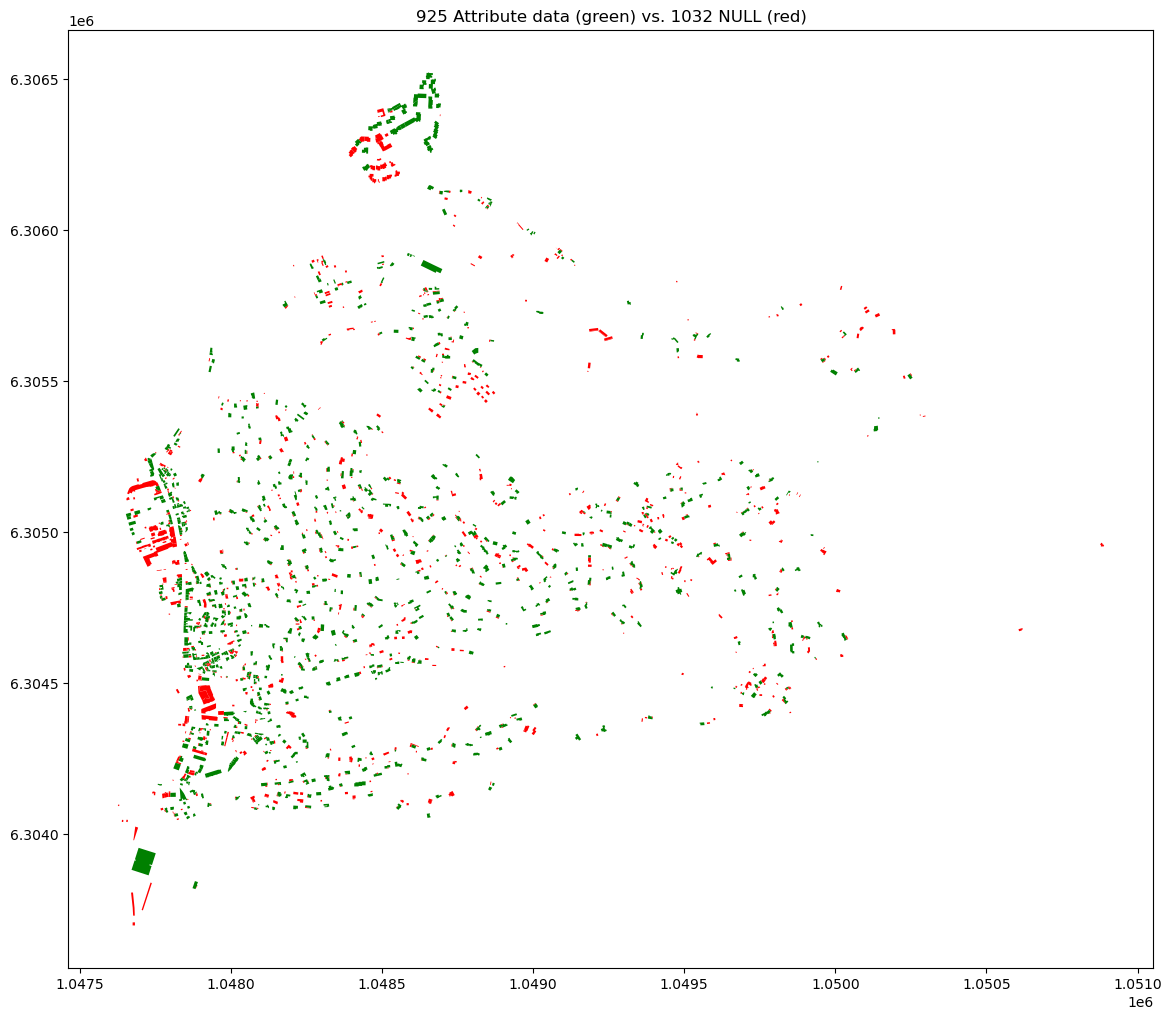

In [17]:
# Appendix A1 : Map of NULL values for building with dwellings
buildings_with_null = filtered_building[filtered_building['nombre_de_logements'].isnull()]
buildings_with_values = filtered_building[filtered_building['nombre_de_logements'].notnull()]
# Plot removed buildings in red
ax = buildings_with_null.plot(color = "red", figsize=(14, 14))
# Plot kept buildings in green
buildings_with_values.plot(ax=ax, color = "green")
plt.title(str(len(buildings_with_values)) + " Attribute data (green) vs. " + str(len(buildings_with_null)) + " NULL (red)")

<Axes: >

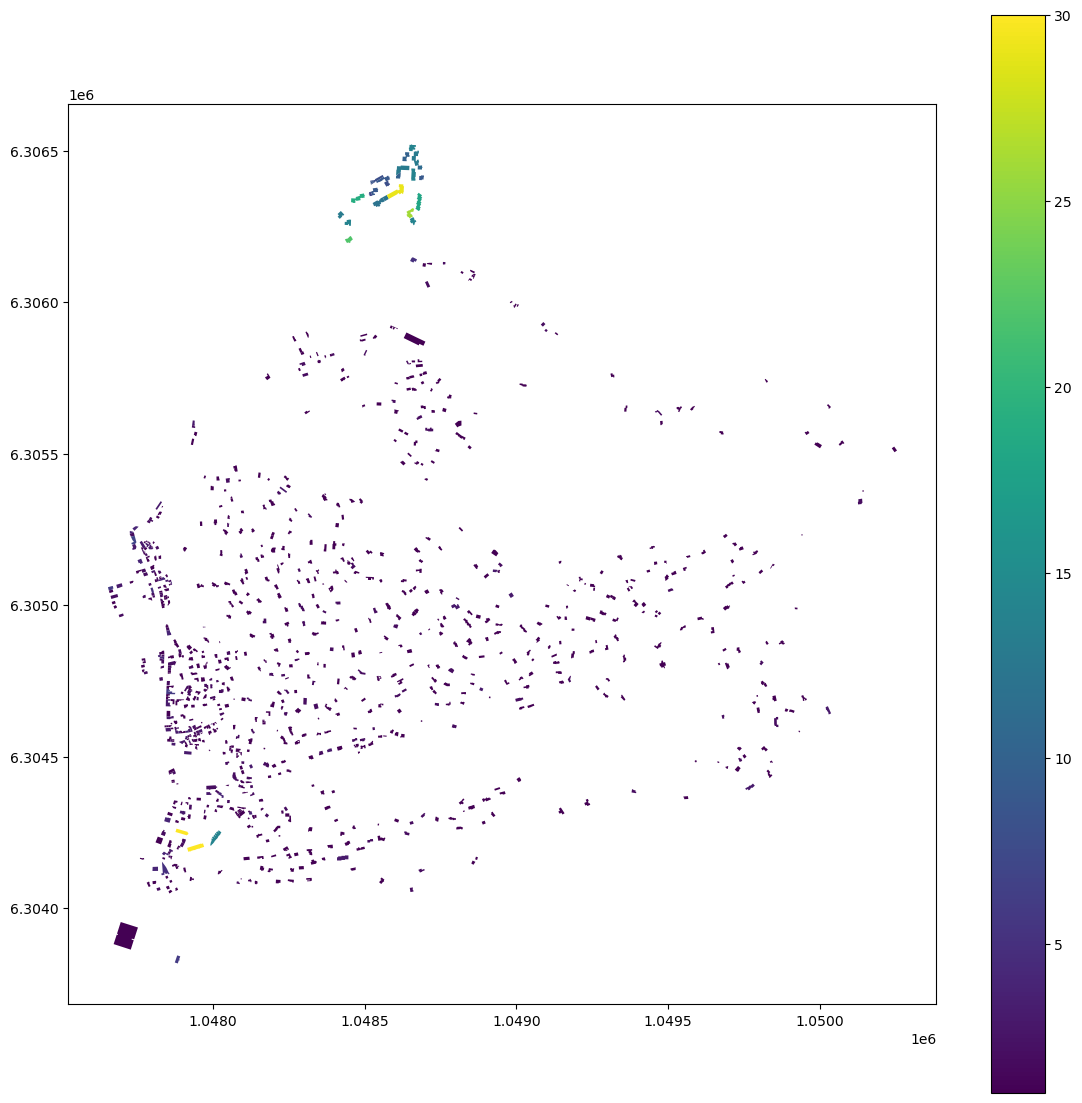

In [80]:
# Appendix A2 : Thematic map of building with number of dwellings
FM_building.plot(column='nombre_de_logements', figsize=(14, 14), legend=True, cmap='viridis')

<Axes: >

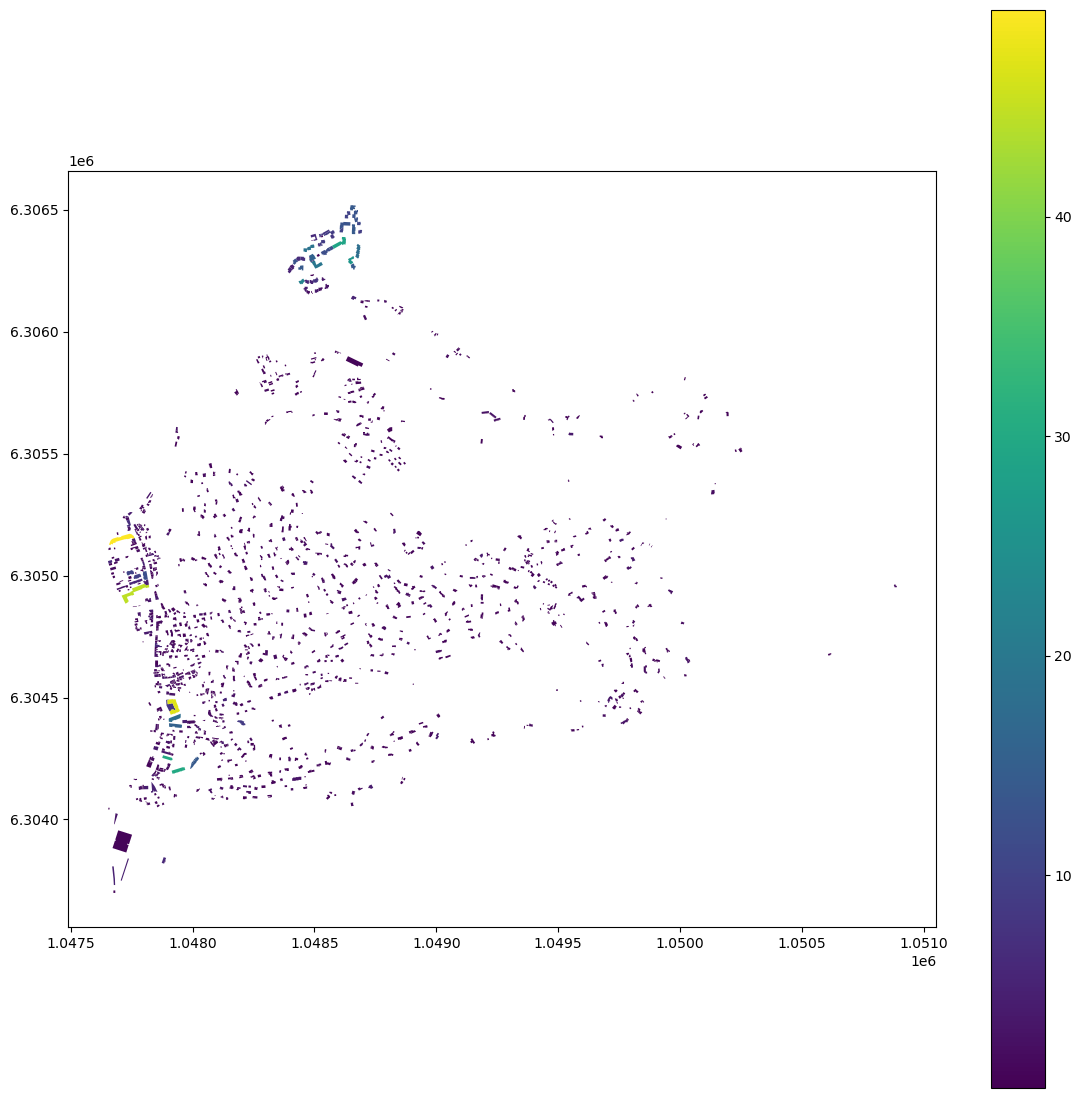

In [81]:
# Appendix A3 : Thematic map of predicted dwellings
FM_building.plot(column='nombre_de_logements_pred', figsize=(14, 14), legend=True, cmap='viridis')

In [ ]:
 ## Random forest
 ## PCA + estimate
 ## Advanced : GEOCLUST? GWR?